# Capstone Two: Data Wrangling - Hospital readmission for patients with diabetes

One patient population that is at increased risk of hospitalization and readmission is that of diabetes. Diabetes is a medical condition that affects approximately 1 in 10 patients in the United States. Patients with diabetes have almost double the chance of being hospitalized than the general population (Ostling et al 2017). Therefore, in this analysis, I will focus on predicting hospital less than 30-day readmissions for patients with diabetes.

## Data Collection

In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
from matplotlib import pyplot as plt
import random
import numpy as np
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell

In [2]:
#print the current working directory
os.getcwd()

'/Users/reneeylewis/Documents/Computer Programming/Data Scientist:Analyst/Springboard/Data Science Prep and Bootcamp courses Docs/Bootcamp/Github Projects/Capstone Projects/Capstone-Diabetes_Readmission'

In [3]:
#print files in the current working directory
wd = os.getcwd()
print(os.listdir(wd))

['.DS_Store', 'Renee Y. Lewis - Capstone Two_ Project Proposal_Diabetes.pdf', 'models', 'README.md', 'Capstone Two: Data Wrangling.ipynb', 'Capstone Two: Exploratory Data Analysis (EDA).ipynb', '.ipynb_checkpoints', '.git', 'data', 'reports']


**Load the `diabetic_data.csv` file into a dataframe, accounting for missing values represented by '?', and view the first 5 rows**

In [4]:
df = pd.read_csv('data/diabetic_data.csv', na_values='?', low_memory=False)
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


**View the last 5 rows of the dataframe**

In [5]:
df.tail()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),NaN,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),NaN,1,1,7,6,...,No,No,No,No,No,No,No,No,No,NO


The main dataset, `diabetic_data.csv` has three variables/columns: `admission_type_id`, `discharge_disposition_id`, `admission_source_id` that have Integer identifiers corresponding to distinct categorical values. These values are stored in separate ID mapping csv files. I will load each of these as a separate dataframe.

**Load `admission_type_id.csv` data into a dataframe and view all rows**

In [6]:
admis_type = pd.read_csv('data/admission_type_id.csv')
admis_type

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped


**Load `discharge_disposition_id.csv` data into a dataframe and view all rows**

In [7]:
discharge = pd.read_csv('data/discharge_disposition_id.csv')
discharge

,discharge_disposition_id,description
0,1,Discharged to home
1,2,Discharged/transferred to another short term h...
2,3,Discharged/transferred to SNF
3,4,Discharged/transferred to ICF
4,5,Discharged/transferred to another type of inpa...
5,6,Discharged/transferred to home with home healt...
6,7,Left AMA
7,8,Discharged/transferred to home under care of H...
8,9,Admitted as an inpatient to this hospital
9,10,Neonate discharged to another hospital for neo...


**Load admission_source_id.csv data into a dataframe and view all rows**

In [8]:
admis_source = pd.read_csv('data/admission_source_id.csv')
admis_source

,admission_source_id,description
0,1,Physician Referral
1,2,Clinic Referral
2,3,HMO Referral
3,4,Transfer from a hospital
4,5,Transfer from a Skilled Nursing Facility (SNF)
5,6,Transfer from another health care facility
6,7,Emergency Room
7,8,Court/Law Enforcement
8,9,Not Available
9,10,Transfer from critial access hospital


**Map columns from the ID mapping dataframes: `admis_type`, `discharge`, `admis_source`, to the original `diabetic_data` dataframe, df. Print the first 10 rows to view the mapping update.**

In [9]:
admis_type_map = dict(admis_type[['admission_type_id', 'description']].values)
df['admission_type_id'] = df.admission_type_id.map(admis_type_map)

discharge_map = dict(discharge[['discharge_disposition_id', 'description']].values)
df['discharge_disposition_id'] = df.discharge_disposition_id.map(discharge_map)

admis_source_map = dict(admis_source[['admission_source_id', 'description']].values)
df['admission_source_id'] = df.admission_source_id.map(admis_source_map)

df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,NaN,Not Mapped,Physician Referral,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,Emergency,Discharged to home,Emergency Room,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,Emergency,Discharged to home,Emergency Room,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,Emergency,Discharged to home,Emergency Room,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,Emergency,Discharged to home,Emergency Room,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


## Data Definition

**View the number of rows and columns**

In [10]:
df.shape

(101766, 50)

**View what the row indices are**

In [11]:
df.index

RangeIndex(start=0, stop=101766, step=1)

**View the variables/column names of the entire dataframe**

In [12]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

**Review column names, number of observations (non-null) value counts and make sure the variables have the correct datatype**

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         96475 non-null   object
 7   discharge_disposition_id  98075 non-null   object
 8   admission_source_id       94985 non-null   object
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

Not all of the variables have equal number of observations. There are missing values which needs to be addressed.

**Determine the number of counts per datatype**

In [14]:
df.dtypes.value_counts()

object    40
int64     10
dtype: int64

This reveals that there are 40 object columns and 10 interger columns in my dataset. More than half of my data consists of string or text values that will need to be explored and cleaned before modeling.

**Print the count of unique values for every column regardless of datatype**

In [15]:
df.nunique()

encounter_id                101766
patient_nbr                  71518
race                             5
gender                           3
age                             10
weight                           9
admission_type_id                7
discharge_disposition_id        25
admission_source_id             16
time_in_hospital                14
payer_code                      17
medical_specialty               72
num_lab_procedures             118
num_procedures                   7
num_medications                 75
number_outpatient               39
number_emergency                33
number_inpatient                21
diag_1                         716
diag_2                         748
diag_3                         789
number_diagnoses                16
max_glu_serum                    4
A1Cresult                        4
metformin                        4
repaglinide                      4
nateglinide                      4
chlorpropamide                   4
glimepiride         

**Calculate the percent of unique values per column**

In [16]:
(df.nunique() / df.shape[0]) * 100

encounter_id                100.000000
patient_nbr                  70.276910
race                          0.004913
gender                        0.002948
age                           0.009826
weight                        0.008844
admission_type_id             0.006879
discharge_disposition_id      0.024566
admission_source_id           0.015722
time_in_hospital              0.013757
payer_code                    0.016705
medical_specialty             0.070751
num_lab_procedures            0.115952
num_procedures                0.006879
num_medications               0.073698
number_outpatient             0.038323
number_emergency              0.032427
number_inpatient              0.020636
diag_1                        0.703575
diag_2                        0.735020
diag_3                        0.775308
number_diagnoses              0.015722
max_glu_serum                 0.003931
A1Cresult                     0.003931
metformin                     0.003931
repaglinide              

**Check to see if the `encounter_id` column is a unique identifier**

In [17]:
df.encounter_id.is_unique

True

The number of unique values for `encounter_id` and `patient_nbr` pretty much equals the total number of records in the dataframe, which indicates that these variables are more than likely identifiers and will not be used when modeling.

**Check for duplicate rows**

In [18]:
duplicateRowsdf = df[df.duplicated()]
duplicateRowsdf

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted


**Review the numeric summary statistics, transposed to fit on the screen**

In [19]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,1.652016e+08,1.026403e+08,12522.0,84961194.0,152388987.0,2.302709e+08,443867222.0
patient_nbr,101766.0,5.433040e+07,3.869636e+07,135.0,23413221.0,45505143.0,8.754595e+07,189502619.0
time_in_hospital,101766.0,4.395987e+00,2.985108e+00,1.0,2.0,4.0,6.000000e+00,14.0
num_lab_procedures,101766.0,4.309564e+01,1.967436e+01,1.0,31.0,44.0,5.700000e+01,132.0
num_procedures,101766.0,1.339730e+00,1.705807e+00,0.0,0.0,1.0,2.000000e+00,6.0
num_medications,101766.0,1.602184e+01,8.127566e+00,1.0,10.0,15.0,2.000000e+01,81.0
number_outpatient,101766.0,3.693572e-01,1.267265e+00,0.0,0.0,0.0,0.000000e+00,42.0
number_emergency,101766.0,1.978362e-01,9.304723e-01,0.0,0.0,0.0,0.000000e+00,76.0
number_inpatient,101766.0,6.355659e-01,1.262863e+00,0.0,0.0,0.0,1.000000e+00,21.0
number_diagnoses,101766.0,7.422607e+00,1.933600e+00,1.0,6.0,8.0,9.000000e+00,16.0


## Data Cleaning

**Rename these variables to be clearer: `number_outpatient`, `number_emergency`, `number_inpatient`, `change`.
Rename `citoglipton` to correct the mispelling. Print column names to view the updates**

In [20]:
df.rename(columns = {'number_outpatient':'num_outpatient_visit', 'number_emergency': 'num_emerg_visit', 'number_inpatient':'num_inpatient_visit', 'change': 'change_of_meds', 'citoglipton': 'sitagliptin'}, inplace=True)
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'num_outpatient_visit', 'num_emerg_visit', 'num_inpatient_visit',
       'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'sitagliptin',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change_of_meds', 'diabetesMed',
       'readmitted'],
      dtype='object')

**Variables, `encounter_id` and `patient_nbr`, are just identifiers and Diabetes medications: `examide` and `sitagliptin` have only 1 value, 'No'. These 4 variables are not useful for analysis so we'll delete them from the dataset.**

In [21]:
#count the number of rows for 'examide'
df['examide'].value_counts()

No    101766
Name: examide, dtype: int64

In [22]:
#count the number of rows for 'sitagliptin''
df['sitagliptin'].value_counts()

No    101766
Name: sitagliptin, dtype: int64

In [23]:
#drop variables 'encounter_id', 'patient_nbr', 'examide' and 'sitagliptin'
df = df.drop(columns=['encounter_id', 'patient_nbr', 'examide', 'sitagliptin'], axis=1)

**The `gender` variable has a value of 'Unknown/Invalid'. Will use the random.choice method to to replace those values with a random selection of this particular column.**

In [24]:
#display the value counts of the 'gender' column
df['gender'].value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

In [25]:
#Create a list of 'gender' values derived from the `columns` list above to use for parameter 'a' in the np.random.choice() function
gender_val = sorted(np.ravel(df['gender'].unique()))

#Create a list of probabilities of the 'gender' values to use for parameter 'p' in the np.random.choice() function
gender_prob = list((df.groupby(df['gender']).size()/df['gender'].count()))

#Randomly replace the 'Unknown/Invalid' values in the 'gender' column with 'Female' or 'Male'
df.loc[df['gender']=='Unknown/Invalid','gender'] = np.random.choice(gender_val, size=(df['gender']=='Unknown/Invalid').sum(), replace=True, p=gender_prob)


In [26]:
#recheck the value counts of the gender' column the ensure that Unknown/Invalid' values were replaced with 'Female'
df['gender'].value_counts()

Female    54711
Male      47055
Name: gender, dtype: int64

**If columns have too much missing data, those columns may need to be dropped from the dataframe. Determine which variables have null values**

In [27]:
df.columns[df.isnull().any()]

Index(['race', 'weight', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'payer_code', 'medical_specialty', 'diag_1',
       'diag_2', 'diag_3'],
      dtype='object')

**Counting the number of missing values in each column of the dataframe as well as the percentages and ordering them decreasing values**

In [28]:
null_count = pd.DataFrame(df.isnull().sum().sort_values(ascending=False), columns=['count'])
null_count['%'] = null_count/len(df)*100

#Only want percentages greater than 0
pos = null_count['%'] > 0
null_count[pos]

,count,%
weight,98569,96.858479
medical_specialty,49949,49.082208
payer_code,40256,39.557416
admission_source_id,6781,6.663326
admission_type_id,5291,5.199182
discharge_disposition_id,3691,3.626948
race,2273,2.233555
diag_3,1423,1.398306
diag_2,358,0.351787
diag_1,21,0.020636


Columns: `admission_source_id`, `admission_type_id`, `discharge_disposition_id`, `race`, `diag_1`, `diag_2` and `diag_3` have a very small percentage of missing values and do not need to be deleted from the dataframe. The `weight` has almost 97%, `payer_code` has almost 40%, they have too many missing values to be analyzed so I will drop these two variables from the dataframe. The `medical_specialty` column has almost 50% of missing values, but this variable may be important, so I will not drop it from the dataframe at this time.

**Drop columns(variables), `weight` and `payer_code` and view the the updated dataframe.**

In [29]:
df = df.drop(columns=['weight', 'payer_code'] , axis=1)
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change_of_meds,diabetesMed,readmitted
0,Caucasian,Female,[0-10),NaN,Not Mapped,Physician Referral,1,Pediatrics-Endocrinology,41,0,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),Emergency,Discharged to home,Emergency Room,3,NaN,59,0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),Emergency,Discharged to home,Emergency Room,2,NaN,11,5,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),Emergency,Discharged to home,Emergency Room,2,NaN,44,1,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),Emergency,Discharged to home,Emergency Room,1,NaN,51,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


**Plot the distributions for the remaining columns with missing values: `admission_source_id`, `admission_type_id`, `discharge_disposition_id`, `race`, `diag_1`, `diag_2`, `diag_3` and `medical_specialty`**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

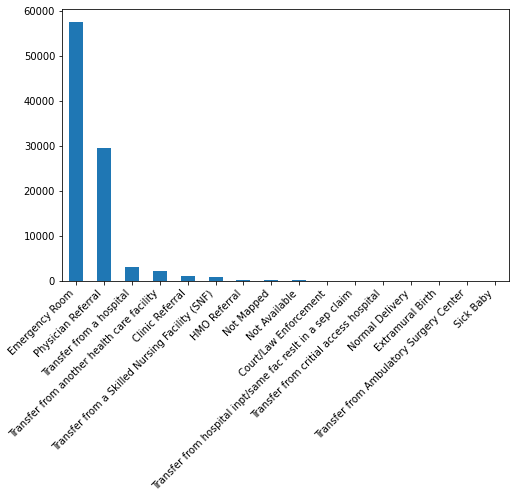

In [30]:
df['admission_source_id'].value_counts().plot(kind='bar', figsize=(8, 5))
plt.xticks(rotation=45, ha='right')

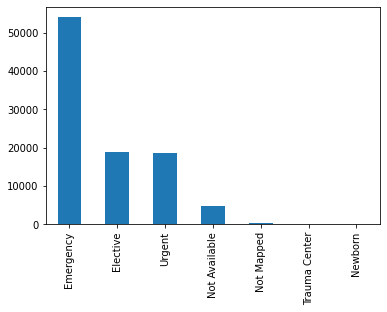

In [31]:
df['admission_type_id'].value_counts().plot(kind='bar')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

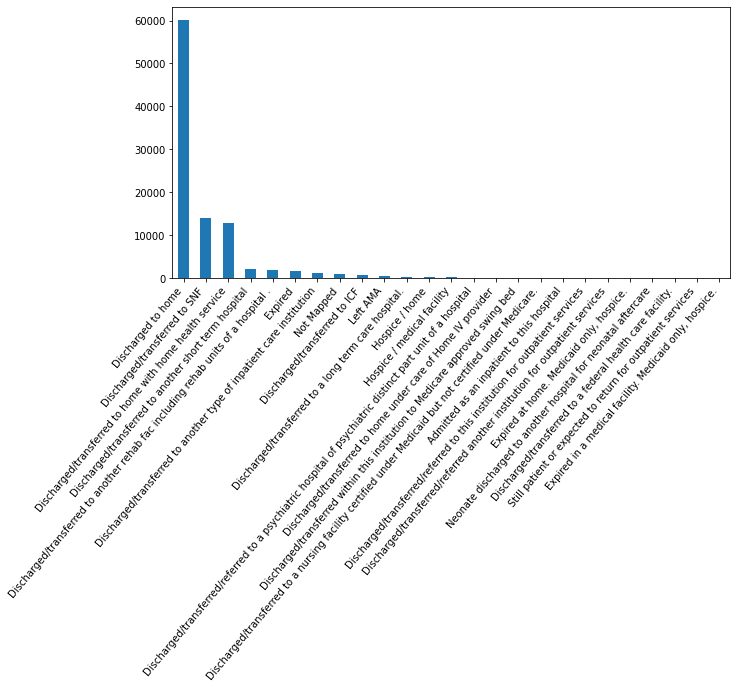

In [32]:
df['discharge_disposition_id'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.xticks(rotation=50, ha='right')

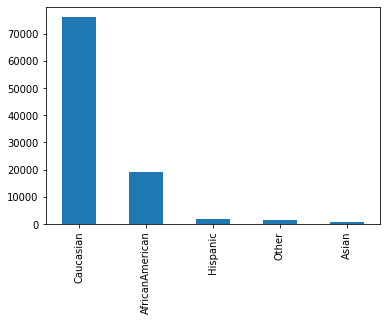

In [33]:
df['race'].value_counts().plot(kind='bar')

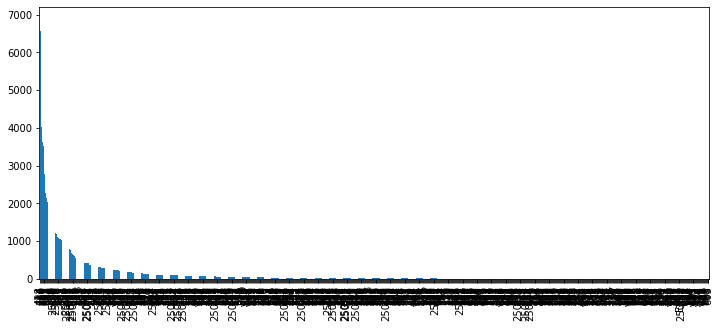

In [34]:
df['diag_1'].value_counts().plot(kind='bar', figsize=(12, 5))

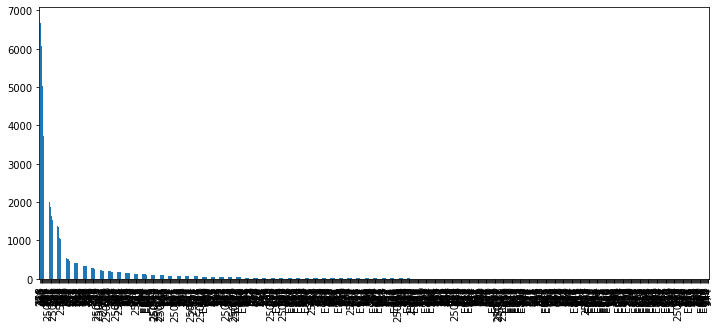

In [35]:
df['diag_2'].value_counts().plot(kind='bar', figsize=(12, 5))

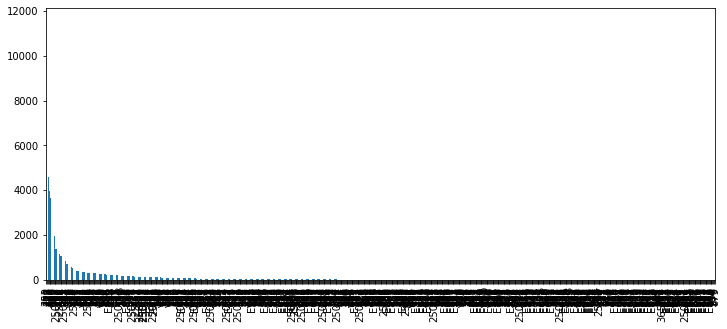

In [36]:
df['diag_3'].value_counts().plot(kind='bar', figsize=(12, 5))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71]),
 <a list of 72 Text major ticklabel objects>)

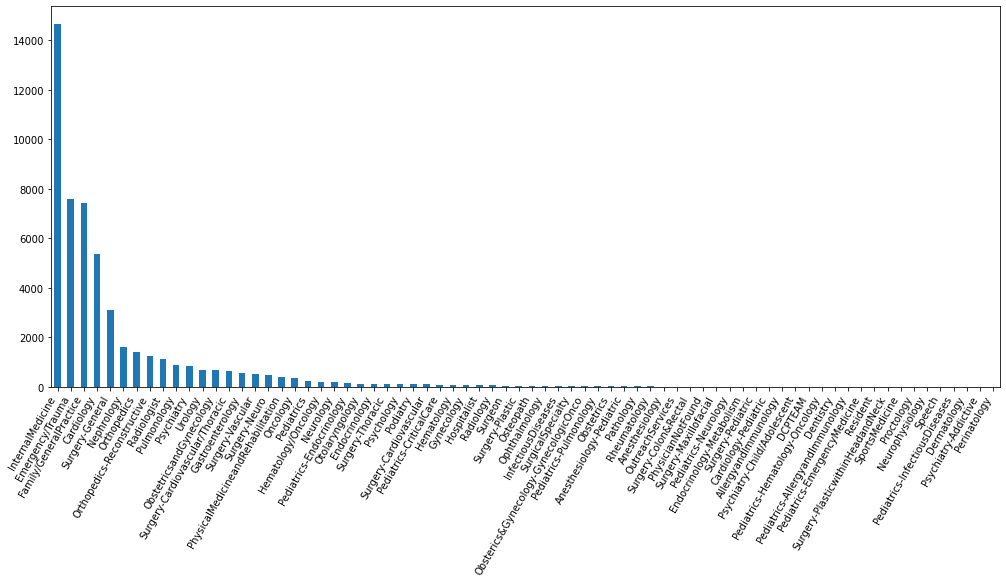

In [37]:
df['medical_specialty'].value_counts().plot(kind='bar', figsize=(17, 7))
plt.xticks(rotation=60, ha='right')

**Deal with missing values in the following columns: `admission_source_id`, `admission_type_id`, `discharge_disposition_id`, `race`, `diag_1`, `diag_2`, `diag_3` and `medical_specialty`**

**Use the random.choice method to fill the missing values with a random selection of a particular column.**

In [38]:
#Create a list of the columns containing missing (null) values
columns = ['admission_source_id', 'admission_type_id', 'discharge_disposition_id', 'race', 'diag_1', 'diag_2', 'diag_3','medical_specialty']

#Create a list of the variables to hold the column values and probabilities
col_values = ['admsource','admtype', 'disch', 'race', 'diag1', 'diag2', 'diag3', 'medspec']
probs = ['admsprob', 'admtypeprob', 'dischprob', 'raceprob', 'diag1prob', 'diag2prob', 'diag3prob', 'medspecprob']

#Create a list of column values derived from the `columns` list above to use for parameter 'a' in the np.random.choice() function
#Create a list of probabilities of the column values to use for parameter 'p' in the np.random.choice() function
for i in range(0, len(columns)):
    col_values[i] = sorted(np.ravel(df[columns[i]].dropna().unique()))
    probs[i] = list((df.groupby(df[columns[i]]).size()/df[columns[i]].count()))

**Replace the missing values using the random.choice method for the following variables: `admission_source_id`, `admission_type_id` `discharge_disposition_id`, `race`, `diag_1`, `diag_2` and `diag_3` and `medical_specialty`**

In [39]:
#Use the values from the 'col_values' and 'probs' variables in the random.choice method
for i in range(0, len(columns)):
    df.loc[df[columns[i]].isnull(),columns[i]] = np.random.choice(col_values[i], size=(df[columns[i]].isnull()).sum(), replace=True, p=probs[i])

**Check to see if replacing missing values changes the distributions**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

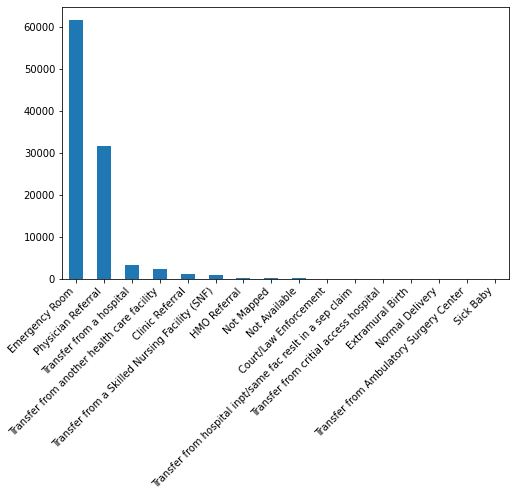

In [40]:
df['admission_source_id'].value_counts().plot(kind='bar', figsize=(8, 5))
plt.xticks(rotation=45, ha='right')

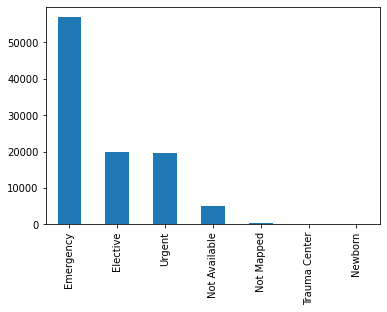

In [41]:
df['admission_type_id'].value_counts().plot(kind='bar')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

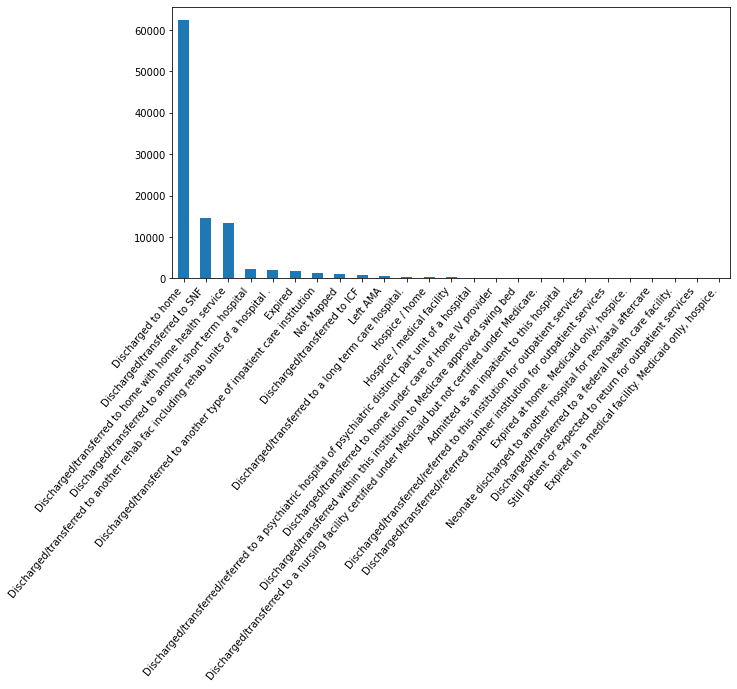

In [42]:
df['discharge_disposition_id'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.xticks(rotation=50, ha='right')

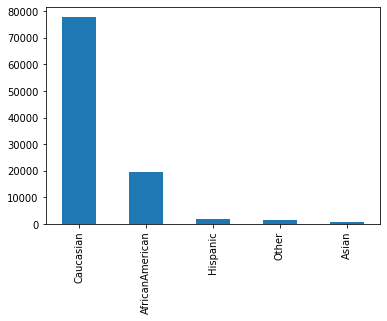

In [43]:
df['race'].value_counts().plot(kind='bar')

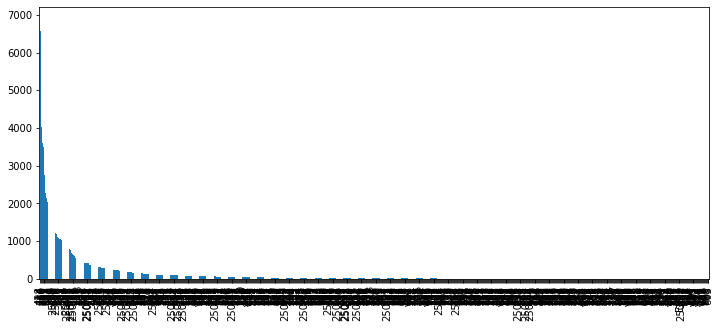

In [44]:
df['diag_1'].value_counts().plot(kind='bar', figsize=(12, 5))

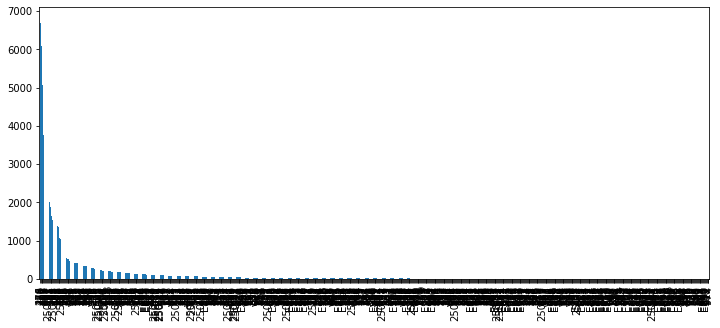

In [45]:
df['diag_2'].value_counts().plot(kind='bar', figsize=(12, 5))

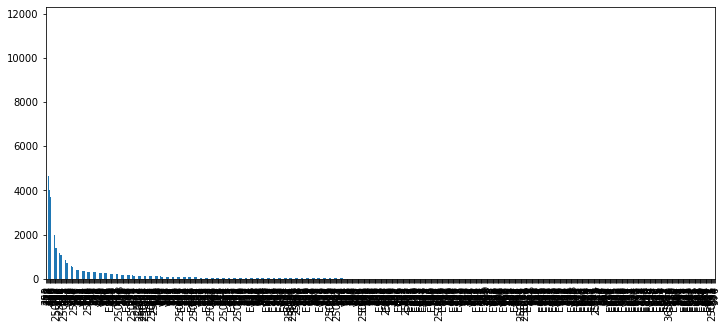

In [46]:
df['diag_3'].value_counts().plot(kind='bar', figsize=(12, 5))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71]),
 <a list of 72 Text major ticklabel objects>)

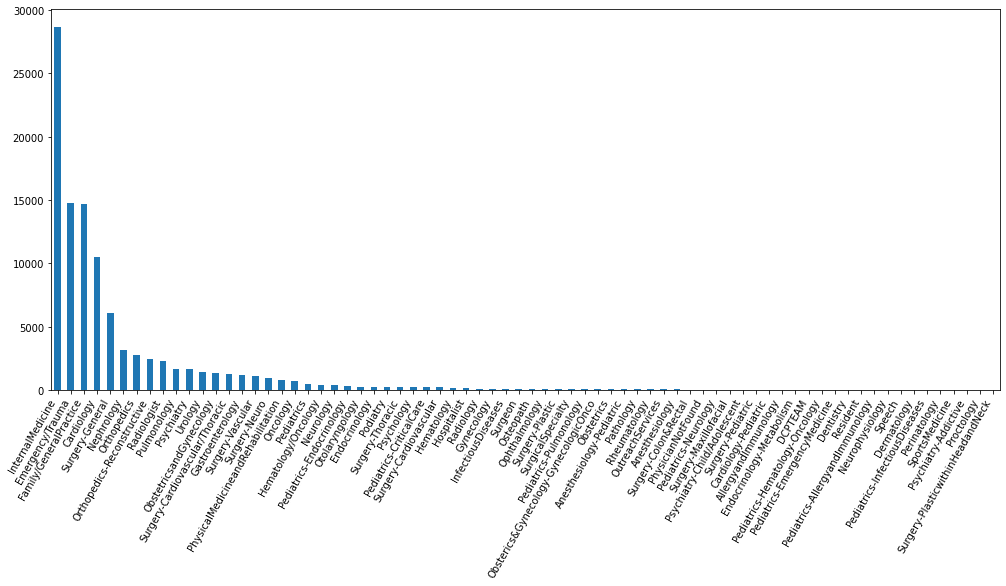

In [47]:
df['medical_specialty'].value_counts().plot(kind='bar', figsize=(17, 7))
plt.xticks(rotation=60, ha='right')

Replacing the missing data has not altered the distributions of the columns: `admission_source_id`, `admission_type_id`, `discharge_disposition_id`, `race`, `diag_1`, `diag_2`, `diag_3` and `medical_specialty`

**Check to ensure there are no longer any null values in the dataframe**

In [48]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 44 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      101766 non-null  object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  object
 3   admission_type_id         101766 non-null  object
 4   discharge_disposition_id  101766 non-null  object
 5   admission_source_id       101766 non-null  object
 6   time_in_hospital          101766 non-null  int64 
 7   medical_specialty         101766 non-null  object
 8   num_lab_procedures        101766 non-null  int64 
 9   num_procedures            101766 non-null  int64 
 10  num_medications           101766 non-null  int64 
 11  num_outpatient_visit      101766 non-null  int64 
 12  num_emerg_visit           101766 non-null  int64 
 13  num_inpatient_visit       101766 non-null  int64 
 14  diag

### Target dependent variable: `readmitted`, tells us if a patient was hospitalized within 30 days, greater than 30 days or not readmitted, after hospital discharge.

In [50]:
#count the number of rows for each type
df['readmitted'].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

**Our aim is to predict less than 30-day readmissions. So, we'll combine the '>30' and 'NO' readmission categories into a single class, making this a binary classification problem.**

In [51]:
#‘>30’ and ‘NO’ readmission categories are grouped as Class 0 and ‘<30’ as Class 1
df['readmitted'] = df['readmitted'].replace(['>30', 'NO'], 0)
df['readmitted'] = df['readmitted'].replace('<30', 1)

#recount the number of rows for each type
df['readmitted'].value_counts()

0    90409
1    11357
Name: readmitted, dtype: int64

**Let’s define a function to calculate the prevalence of population that is readmitted within 30 days and not readmitted within 30 days.**

In [50]:
def calc_prev(x):
    return(sum(x/len(x))*100)

calc_prev(df['readmitted']==0), calc_prev(df['readmitted']==1) 

(88.84008411445974, 11.159915885463626)

It seems that most of the patients, 88.84%, were not readmitted to the hospital after being discharged and around 11.16% of the population is rehospitalized. This represents an imbalanced classification problem which will be addressed in future analysis.

Text(0, 0.5, 'Number of Records')

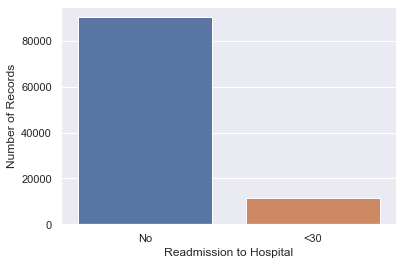

In [52]:
#plot a graph of the numer of readmission to the hospital.
#Set xticks labels to display 'No' and '<30' instead if 0 and 1
sns.set()
sns.countplot(data=df, x='readmitted')
plt.xlabel('Readmission to Hospital')
plt.xticks([0, 1], ['No', '<30'])
plt.ylabel('Number of Records')

**Another important column is `discharge_disposition_id`, which tells us where the patient went after hospital discharge. The unique values listed below shows that some of the patients have died after discharge. We should remove these patient samples from the dataset since they cannot be readmitted.**

In [53]:
#remove the rows where patients died after hospital discharge
df = df.loc[~df['discharge_disposition_id'].isin(['Expired','Expired at home. Medicaid only, hospice.','Expired in a medical facility. Medicaid only, hospice.','Expired, place unknown. Medicaid only, hospice.'])]

In [54]:
#re-check the dataset dimensions. 
df.shape

(100042, 44)

We dropped 1724 samples and 6 columns after data cleaning.

In [55]:
df.head(25)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change_of_meds,diabetesMed,readmitted
0,Caucasian,Female,[0-10),Elective,Not Mapped,Physician Referral,1,Pediatrics-Endocrinology,41,0,...,No,No,No,No,No,No,No,No,No,0
1,Caucasian,Female,[10-20),Emergency,Discharged to home,Emergency Room,3,Surgery-General,59,0,...,No,Up,No,No,No,No,No,Ch,Yes,0
2,AfricanAmerican,Female,[20-30),Emergency,Discharged to home,Emergency Room,2,Orthopedics,11,5,...,No,No,No,No,No,No,No,No,Yes,0
3,Caucasian,Male,[30-40),Emergency,Discharged to home,Emergency Room,2,InternalMedicine,44,1,...,No,Up,No,No,No,No,No,Ch,Yes,0
4,Caucasian,Male,[40-50),Emergency,Discharged to home,Emergency Room,1,Surgery-General,51,0,...,No,Steady,No,No,No,No,No,Ch,Yes,0
5,Caucasian,Male,[50-60),Urgent,Discharged to home,Clinic Referral,3,InternalMedicine,31,6,...,No,Steady,No,No,No,No,No,No,Yes,0
6,Caucasian,Male,[60-70),Elective,Discharged to home,Clinic Referral,4,Family/GeneralPractice,70,1,...,No,Steady,No,No,No,No,No,Ch,Yes,0
7,Caucasian,Male,[70-80),Emergency,Discharged to home,Emergency Room,5,Psychiatry,73,0,...,No,No,No,No,No,No,No,No,Yes,0
8,Caucasian,Female,[80-90),Urgent,Discharged to home,Transfer from a hospital,13,InternalMedicine,68,2,...,No,Steady,No,No,No,No,No,Ch,Yes,0
9,Caucasian,Female,[90-100),Elective,Discharged/transferred to SNF,Transfer from a hospital,12,InternalMedicine,33,3,...,No,Steady,No,No,No,No,No,Ch,Yes,0


In [56]:
df_clean = df

**Save the wrangled data to a new csv file to be used for analysis**

In [57]:
df_clean.to_csv('data/df_clean.csv', index=None)